Helpers

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

Here are helper functions to plot volume or flow rate vs. time with correct labels.

In [2]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

# 1 Calculating average flow rates from volumes

These are the *actual* volume and flow rate functions, used throughout the chapter.  You can ignore the formulas that define them.

In [3]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

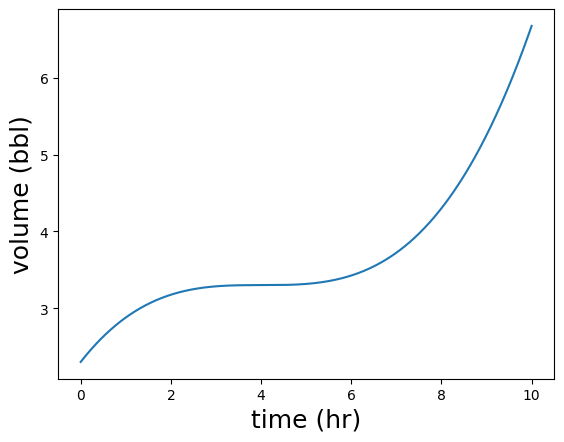

In [4]:
plot_volume(volume,0,10)

## 1.1 Implementing an average_flow_rate function


In [5]:
def average_flow_rate(v,t1,t2):
    return (v(t2) - v(t1))/(t2 - t1)

## 1.2 Picturing the average flow rate with a secant line

## 1.3 Negative rates of change

In [6]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

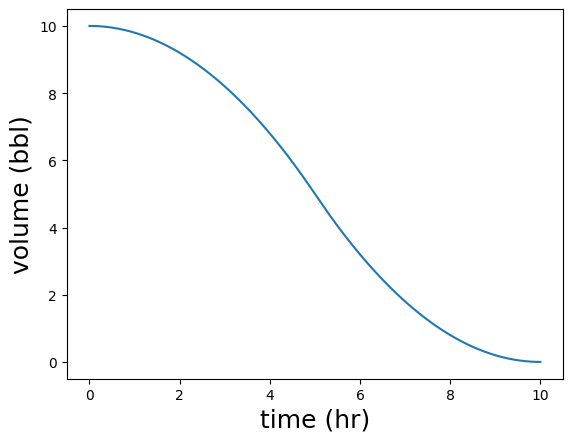

In [7]:
plot_volume(decreasing_volume,0,10)

In [8]:
def interval_flow_rates(v,t1,t2,dt):
    return [(t,average_flow_rate(v,t,t+dt))
                for t in np.arange(t1,t2,dt)]

def plot_interval_flow_rates(volume,t1,t2,dt):
    series = interval_flow_rates(volume,t1,t2,dt)
    times = [t for (t,_) in series]
    rates = [q for (_,q) in series]
    plt.scatter(times,rates)

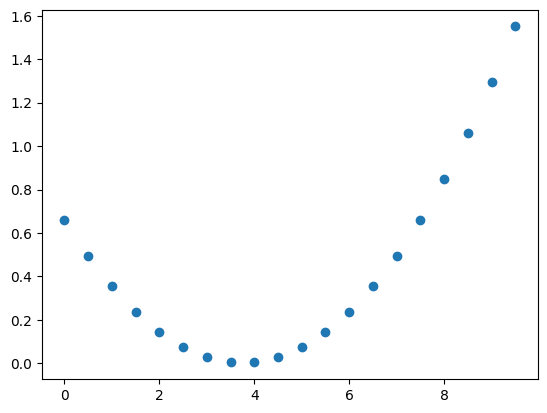

In [9]:
plot_interval_flow_rates(volume,0,10,0.5)

### Ex8.4
0.5時間間隔で、decreasing_volume の流量をプロットせよ。流量が最も少ないのはいつか？つまり、石油が最も速い速度でタンクから出るのはいつか？

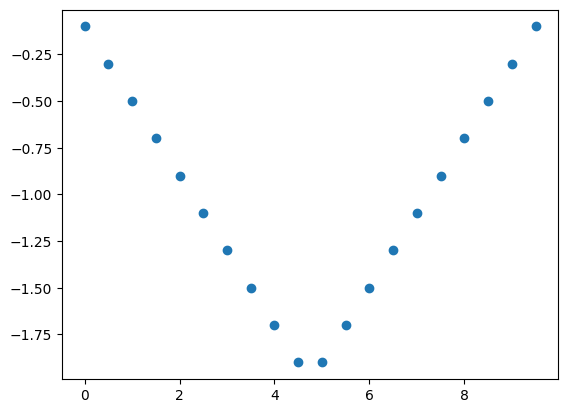

In [10]:
# 5時間の前で最も速い速度でタンクから出る
plot_interval_flow_rates(decreasing_volume,0,10,0.5)

### Ex8.5
linear_volume_function関数を書き、流量を時間でプロットし流量が一定であることを示せ。

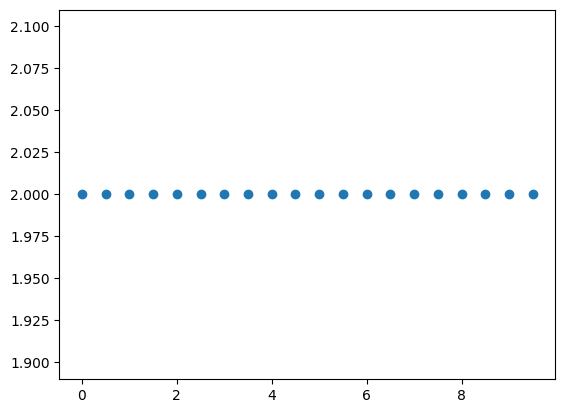

In [11]:
def linear_volume(t):
    return 2 * t

plot_interval_flow_rates(linear_volume,0,10,0.5)

Helpers

In [12]:
def instantaneous_flow_rate(v,t,digits=6):
    tolerance = 10 ** (-digits) #<1>
    h = 1
    approx = average_flow_rate(v,t-h,t+h) #<2>
    for i in range(0,2*digits): #<3>
        h = h / 10
        next_approx = average_flow_rate(v,t-h,t+h) #<4>
        if abs(next_approx - approx) < tolerance:
            return round(next_approx,digits) #<5>
        else:
            approx = next_approx #<6>
    raise Exception("Derivative did not converge") #<7>

instantaneous_flow_rate(volume,1)

0.421875

In [13]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        return instantaneous_flow_rate(v,t)
    return flow_rate_function

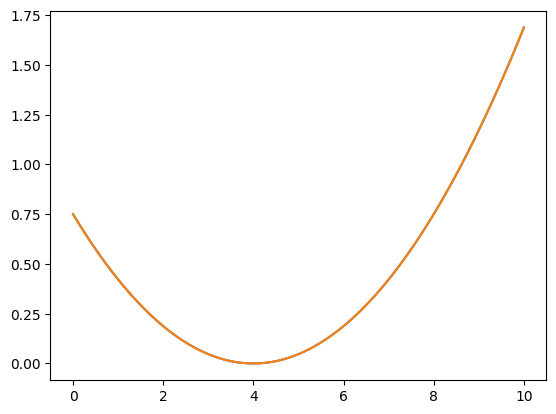

In [14]:
plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)

### Ex8.6
石油量関数のグラフが0.999時間から1.001時間までの区間で直線でないことを確認せよ。

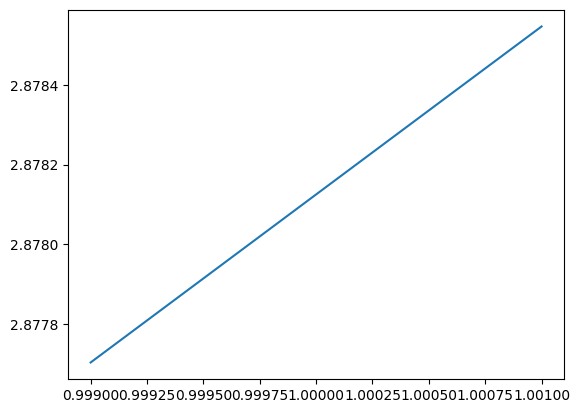

In [15]:
# 見たところ、直線になったが。。。
plot_function(volume,0.999,1.001)

### Ex8.7
t=8の周りの割線をだんだん短くして傾きを計算して、t=8での石油量のグラフの接線の傾きを近似せよ。

In [16]:
average_flow_rate(volume,7.5,8.5)

0.75390625

In [17]:
average_flow_rate(volume,7.9,8.1)

0.7501562500000007

In [18]:
average_flow_rate(volume,7.99,8.01)

0.750001562499996

In [19]:
average_flow_rate(volume,7.999,8.001)

0.7500000156249458

In [20]:
average_flow_rate(volume,7.9999,8.0001)

0.7500000001554312

In [21]:
average_flow_rate(volume,7.99999,8.00001)

0.75

### Ex8.8
Python で定義された sign 関数について、x = 0 のときに微分係数を持たないことを確認せよ。

In [22]:
from numpy import sign

average_flow_rate(sign,-0.5,0.5)

2.0

In [23]:
average_flow_rate(sign,-0.1,0.1)

10.0

In [24]:
average_flow_rate(sign,-0.01,0.01)

100.0

In [25]:
average_flow_rate(sign,-0.00001,0.00001)

99999.99999999999

Helpers

In [29]:
def small_volume_change(q,t,dt):
    return q(t) * dt

def volume_change(q,t1,t2,dt):
    return sum(small_volume_change(q,t,dt)
               for t in np.arange(t1,t2,dt))

### 問8.9
最初の６時間で、およそどのくらいの石油がタンクに貯蔵されるか？最後の４時間はどうか？どちらがより多く貯まるか？

In [34]:
# 最初の6時間
volume_change(flow_rate,0,6,0.01)

1.1278171874999996

In [36]:
# 最後の4時間。よって、最後の4時間の方が多く貯まる
volume_change(flow_rate,6,10,0.01)

3.2425031249999257